<h1>Deep-dentistry model for decay analysis</h1>

In [1]:
#Setting up resources and libraries required

import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Flatten, Dense
from keras.layers.convolutional import *
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#Local and relative paths to the files are used..
train_path = 'Data/train'
valid_path = 'Data/validate'
test_path = 'Data/test'

In [3]:
train_bconvert = ImageDataGenerator().flow_from_directory(train_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=20)
valid_bconvert = ImageDataGenerator().flow_from_directory(valid_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=10)
test_bconvert = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=20)

Found 1234 images belonging to 2 classes.
Found 307 images belonging to 2 classes.
Found 386 images belonging to 2 classes.


In [4]:
# Function plots images with labels
def plots(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_bconvert)

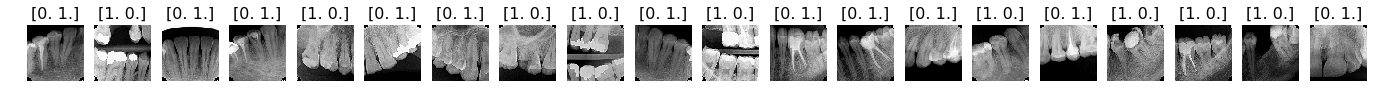

In [7]:
plots(imgs, titles=labels)

<h2>Network Architecture</h2>

In [4]:
input1 = keras.layers.Input(shape=(64, 64, 3))
C1 = Conv2D(32, (3, 3), strides=(2, 2), activation='linear', input_shape=(64,64,3),
                kernel_regularizer=regularizers.l2(9.999999747378752e-05), padding='valid')(input1)
BN1 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C1)
A1 = Activation('relu')(BN1)
C2=Conv2D(64, (3, 3), strides=(1, 1), activation='linear', input_shape=(64,64,3),
                kernel_regularizer=regularizers.l2(9.999999747378752e-05), padding='same')(A1)
BN2 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C2)
A2 = Activation('relu')(BN2)
C_sep_1 = SeparableConv2D(64, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A2)
BN3 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_1)
add_1 = keras.layers.add([A2,BN3])
A3 = Activation('relu')(add_1)


C3 = Conv2D(128, (7, 7), strides=(1, 1), activation='linear', input_shape=(64,64,3),
                kernel_regularizer=regularizers.l2(9.999999747378752e-05), padding='same')(A3)
BN4 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C3)
A4 = Activation('relu')(BN4)
C_sep_2 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A4)
BN5 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_2)
add_2= keras.layers.add([A4,BN5])
A5 = Activation('relu')(add_2)
C_sep_3 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A5)
BN6 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_3)
add_3= keras.layers.add([A5,BN6])
A6 = Activation('relu')(add_3)
C_sep_4 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A6)
BN7 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_4)
add_4= keras.layers.add([A6,BN7])
A7 = Activation('relu')(add_4)
C_sep_5 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A7)
BN8 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_5)
add_5= keras.layers.add([A4,BN8])
A8 = Activation('relu')(add_5)

MP1 = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last')(A8)
DO1 = keras.layers.Dropout(rate=0.3, noise_shape=None, seed=None) (MP1)
C_sep_6 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(DO1)
BN9 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_6)
add_6= keras.layers.add([BN9,DO1])
A9 = Activation('relu')(add_6)

C4 = Conv2D(128, (7, 7), strides=(1, 1), activation='linear', input_shape=(64,64,3),
                kernel_regularizer=regularizers.l2(9.999999747378752e-05), padding='same')(A9)
BN10 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C4)
A10 = Activation('relu')(BN10)
C_sep_7 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A10)
BN11 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_7)
add_7= keras.layers.add([A10,BN11])
A11 = Activation('relu')(add_7)

C_sep_8 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A11)
BN12 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_8)
add_8= keras.layers.add([A11,BN12])
A12 = Activation('relu')(add_8)

C_sep_9 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A12)
BN13 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_9)
add_9= keras.layers.add([A12,BN13])
A13 = Activation('relu')(add_9)

C_sep_10 = SeparableConv2D(128, (3, 3),dilation_rate=(1, 1), depth_multiplier=1, strides=(1, 1),padding='same',
            activation='linear',depthwise_initializer='Zeros', kernel_regularizer=regularizers.l2(9.999999747378752e-05),
                         use_bias=True, pointwise_initializer='glorot_uniform', bias_initializer='zeros', 
                          depthwise_regularizer=regularizers.l2(9.999999747378752e-05), pointwise_regularizer=regularizers.l2(9.999999747378752e-05))(A13)
BN14 = BatchNormalization(axis=-1, epsilon=0.001, mode=0, momentum=0.99, weights=None)(C_sep_10)
add_10= keras.layers.add([A10,BN14])

A14 = Activation('relu')(add_10)

DO2 = keras.layers.Dropout(rate=0.5, noise_shape=None, seed=None)(A14)
F1 = Flatten()(DO2)
out = keras.layers.Dense(units=2, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                        kernel_regularizer=None)(F1)
model = keras.models.Model(inputs=[input1], outputs=out)

C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsilon=0.001, momentum=0.99, weights=None)`
  after removing the cwd from sys.path.
C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsilon=0.001, momentum=0.99, weights=None)`
  
C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsilon=0.001, momentum=0.99, weights=None)`
  
C:\Users\DesignerBe\AppData\Local\conda\conda\envs\MLDL_env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(axis=-1, epsil

In [5]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 31, 31, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 31, 31, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 31, 31, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
hist = model.fit_generator(train_bconvert, steps_per_epoch=55, 
                    validation_data=valid_bconvert, validation_steps=25, epochs=5, verbose=2) 

Epoch 1/5
 - 131s - loss: 1.0422 - acc: 0.6282 - val_loss: 0.9594 - val_acc: 0.6120
Epoch 2/5
 - 61s - loss: 0.7932 - acc: 0.7022 - val_loss: 0.8198 - val_acc: 0.7166
Epoch 3/5
 - 42s - loss: 0.6601 - acc: 0.7586 - val_loss: 0.8228 - val_acc: 0.6356
Epoch 4/5
 - 45s - loss: 0.5934 - acc: 0.8009 - val_loss: 0.8575 - val_acc: 0.6356
Epoch 5/5
 - 49s - loss: 0.5447 - acc: 0.8179 - val_loss: 0.8327 - val_acc: 0.6721


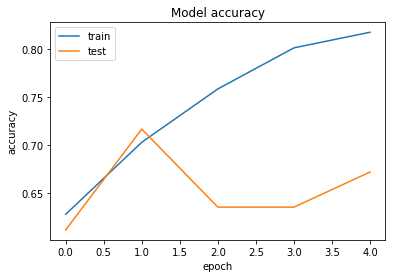

In [8]:
#Accuracy Plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

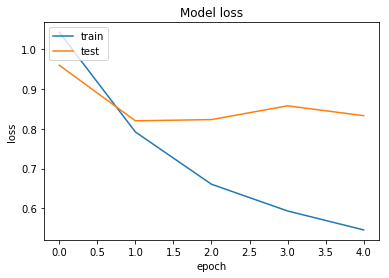

In [9]:
#loss Plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Results</h2>

In [10]:
test_bconf = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['DECAYED','DECAYFREE'],batch_size=100)
test_imgs, test_labels = next(test_bconf)

Found 386 images belonging to 2 classes.


In [12]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.],
      dtype=float32)

In [13]:
predictions = model.predict_generator(test_bconf, steps=1, verbose=0)


In [14]:
predictions=np.round(predictions,0)

In [15]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31 19]
 [17 33]]


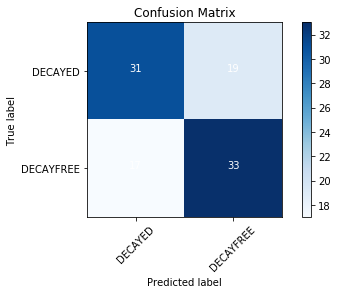

In [18]:
cm_plot_labels = ['DECAYED','DECAYFREE']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')